# Movie Box Office Data Analysis and Data Preprocessing

## Project Objective and Scope

This project aims to conduct a comprehensive analysis of global box office performance from 2000 to 2024. The dataset provides a rich source of information, including key metrics of the film industry such as release dates, genres, production budgets, and worldwide revenues. It offers a unique opportunity to understand industry trends and analyze audience preferences over the years.

Within the scope of this project:

* Data Preprocessing: The goal is to handle missing, inconsistent, or erroneous values, clean the data, and transform it into a structure suitable for analysis.
* Data Analysis: Topics such as changes in the popularity of film genres over the years and the relationship between budgets and revenues will be examined.
* Trend Exploration: Shifts in audience preferences over time and the dynamics of the film industry will be explored in detail.

This study aims to provide valuable insights for researchers, data scientists, and film industry enthusiasts while showcasing the potential of data science tools in the context of the film industry.

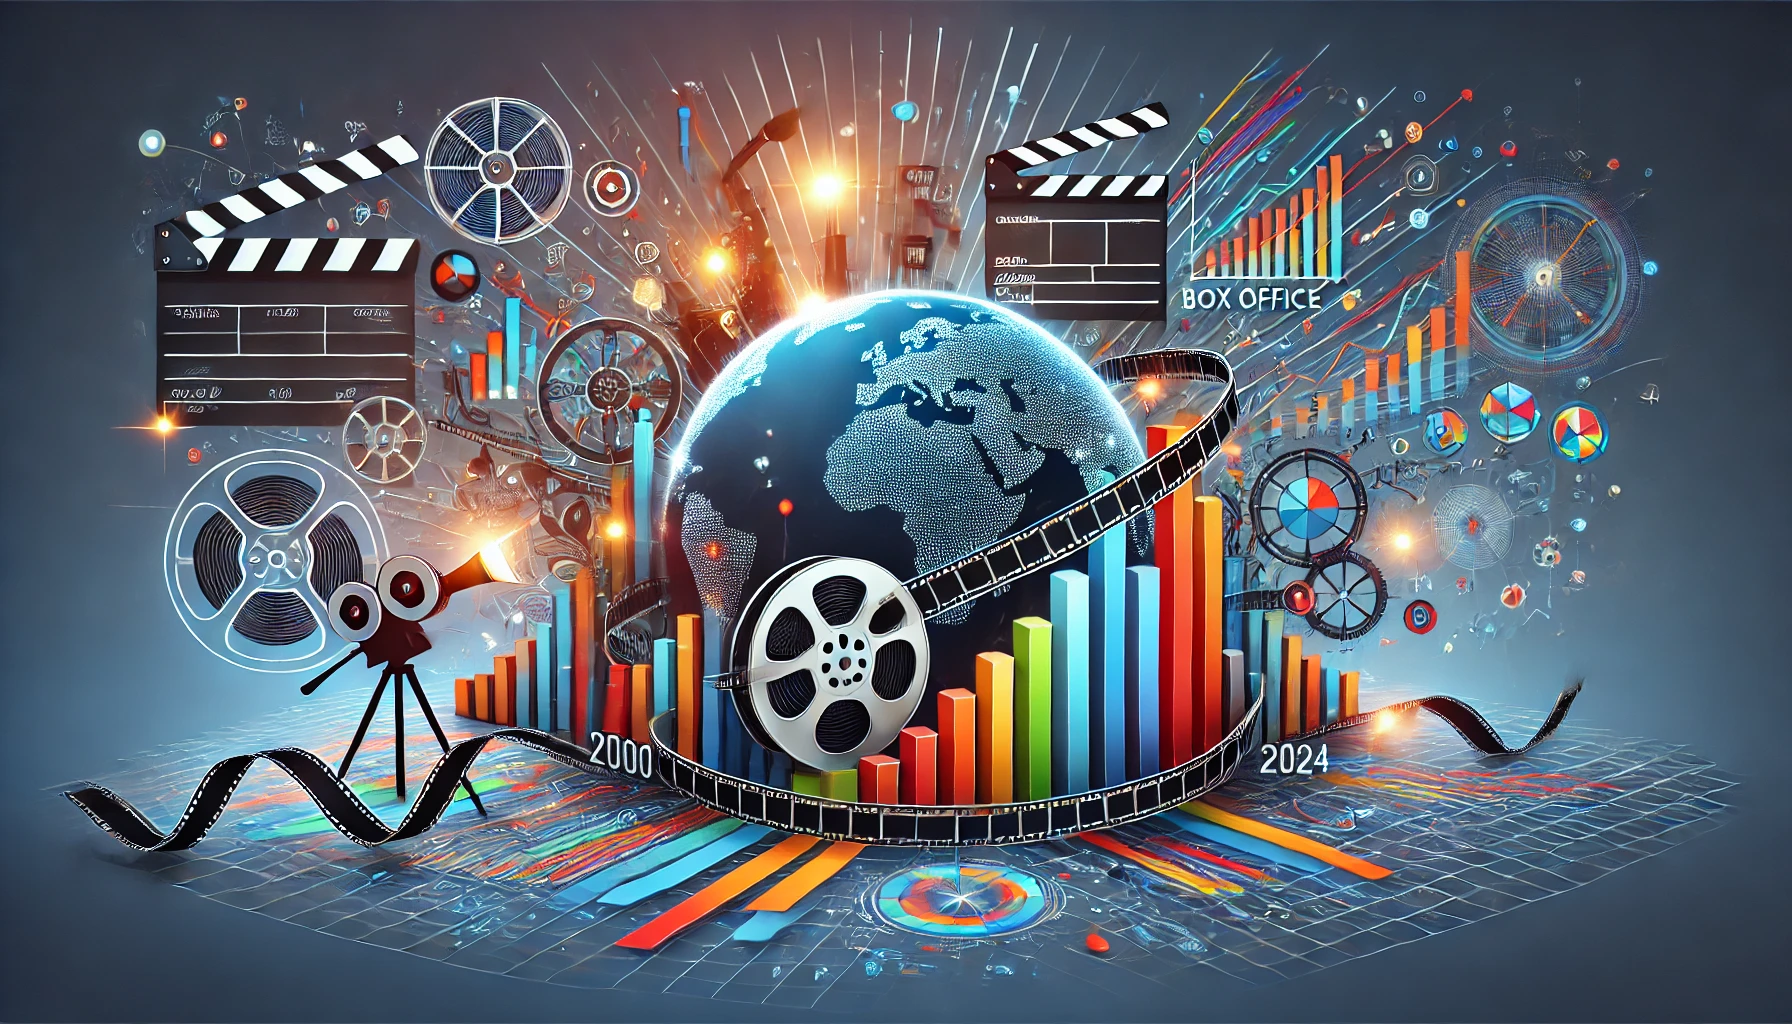

## Analisis Content

1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Data Analisis And İmport](#3)
4. [Vote Count data preprocessing](#4)
5. [Missing Data Analysis](#5)
6. [Visualization of Missing Data](#6)
7. [Deletion of Missing Data](#7)
8. [Data Analysis](#8)
9. [Total Box Office Revenue Over Years](#9)
10. [Distribution of Domestic and Foreign Revenue Percentages](#10)
11. [Highest Grossing Films](#11)
12. [Movies with the highest box office revenue domestically.](#12)
13. [Movies with the Highest Votes](#13)
14. [Heat Map](#14)
15. [Türkiye and World Total movies](#15)
16. [Comparison of total box office revenues in Turkey and the World](#16)
17. [Türkiye Data Analysis](#17)
18. [Vote Counts of Movies in Turkey](#18)
19. [Ratings of Films in Turkey](#19)
20. [Box Office Revenues of Films in Turkey](#20)


<a id = "1"></a>
## Python Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-box-office-dataset-2000-2024/enhanced_box_office_data(2000-2024)u.csv


<a id = "2"></a>
## Data Content

**Rank**: The global ranking of the film based on its worldwide box office revenue.  
**Title Group**: The name of the film or film series.  
**Worldwide**: The total worldwide box office revenue of the film.  
**Domestic**: The total domestic (local) box office revenue of the film.  
**Domestic (%)**: The percentage of worldwide revenue earned domestically.  
**Foreign ($)**: The total foreign (international) box office revenue of the film.  
**Foreign (%)**: The percentage of worldwide revenue earned from foreign markets.  
**Year**: The release year of the film.  
**Genres**: The genres associated with the film (e.g., Action, Drama, Comedy).  
**Rating**: The average audience rating from TMDB (e.g., 7.5/10).  
**Vote_Count**: The number of votes the film has received on TMDB.  
**Original_Language**: The primary language of the film.  
**Production_Countries**: The countries where the film was produced.  


<a id = "3"></a>
## Data Analisis And İmport

In [2]:
df = pd.read_csv("/kaggle/input/movies-box-office-dataset-2000-2024/enhanced_box_office_data(2000-2024)u.csv")

In [3]:
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,5000.0,1.005000e+02,5.774008e+01,1.0,50.75,100.50,1.502500e+02,2.000000e+02
$Worldwide,5000.0,1.192137e+08,2.005243e+08,1666028.0,24662197.25,48446575.00,1.197588e+08,2.799439e+09
$Domestic,5000.0,4.472523e+07,7.727026e+07,0.0,92751.50,17984212.00,5.386847e+07,9.366622e+08
Domestic %,5000.0,3.574062e+01,3.065699e+01,0.0,0.20,37.05,5.780000e+01,1.000000e+02
$Foreign,5000.0,7.448809e+07,1.334932e+08,0.0,13710340.50,30194438.00,7.211578e+07,1.993811e+09
Foreign %,5000.0,6.425664e+01,3.065453e+01,0.0,42.20,62.95,9.980000e+01,1.000000e+02
Year,5000.0,2.012000e+03,7.211824e+00,2000.0,2006.00,2012.00,2.018000e+03,2.024000e+03
Vote_Count,4830.0,2.531586e+03,3.946273e+03,0.0,205.25,1035.50,3.065000e+03,3.675300e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  5000 non-null   int64  
 1   Release Group         5000 non-null   object 
 2   $Worldwide            5000 non-null   float64
 3   $Domestic             5000 non-null   float64
 4   Domestic %            5000 non-null   float64
 5   $Foreign              5000 non-null   float64
 6   Foreign %             5000 non-null   float64
 7   Year                  5000 non-null   int64  
 8   Genres                4822 non-null   object 
 9   Rating                4830 non-null   object 
 10  Vote_Count            4830 non-null   float64
 11  Original_Language     4830 non-null   object 
 12  Production_Countries  4800 non-null   object 
dtypes: float64(6), int64(2), object(5)
memory usage: 507.9+ KB


<a id = "5"></a>
## Missing Data Analysis

In [6]:
## missing values
df.isnull().sum()

Rank                      0
Release Group             0
$Worldwide                0
$Domestic                 0
Domestic %                0
$Foreign                  0
Foreign %                 0
Year                      0
Genres                  178
Rating                  170
Vote_Count              170
Original_Language       170
Production_Countries    200
dtype: int64

In [7]:
## total missing values
df.isnull().sum().sum()

888

In [8]:
## Show if there is at least 1 missing value
df[df.isnull().any(axis = 1)]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
38,39,The Exorcist 2000 Director's Cut,112053066.0,39671011.0,35.4,72382055.0,64.6,2000,NaN,NaN,NaN,NaN,NaN
159,160,Widow of St. Pierre,7193889.0,3193889.0,44.4,4000000.0,55.6,2000,NaN,NaN,NaN,NaN,NaN
169,170,The Jungle Book 2000 Re-release,4466472.0,0.0,0.0,4466472.0,100.0,2000,NaN,NaN,NaN,NaN,NaN
191,192,Blood Simple 2000 Re-release,2068701.0,1701855.0,82.3,366846.0,17.7,2000,NaN,NaN,NaN,NaN,NaN
196,197,The Life and Times of Hank Greenberg,1712385.0,1712385.0,100.0,0.0,0.0,2000,Documentary,6.1/10,9.0,en,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,166,Ruki vverkh!,9630048.0,0.0,0.0,9630048.0,100.0,2024,NaN,NaN,NaN,NaN,NaN
4966,167,The Chosen: S4 Episodes 4-6,9482744.0,9482744.0,100.0,0.0,0.0,2024,NaN,NaN,NaN,NaN,NaN
4967,168,The Boy with Pink Trousers,9449929.0,0.0,0.0,9449929.0,100.0,2024,NaN,NaN,NaN,NaN,NaN
4970,171,Onegin,9201680.0,0.0,0.0,9201680.0,100.0,2024,Music,0.0/10,0.0,en,NaN


<a id = "6"></a>
## Visualization of Missing Data

In [9]:
!pip install missingno

In [10]:
import missingno as msno

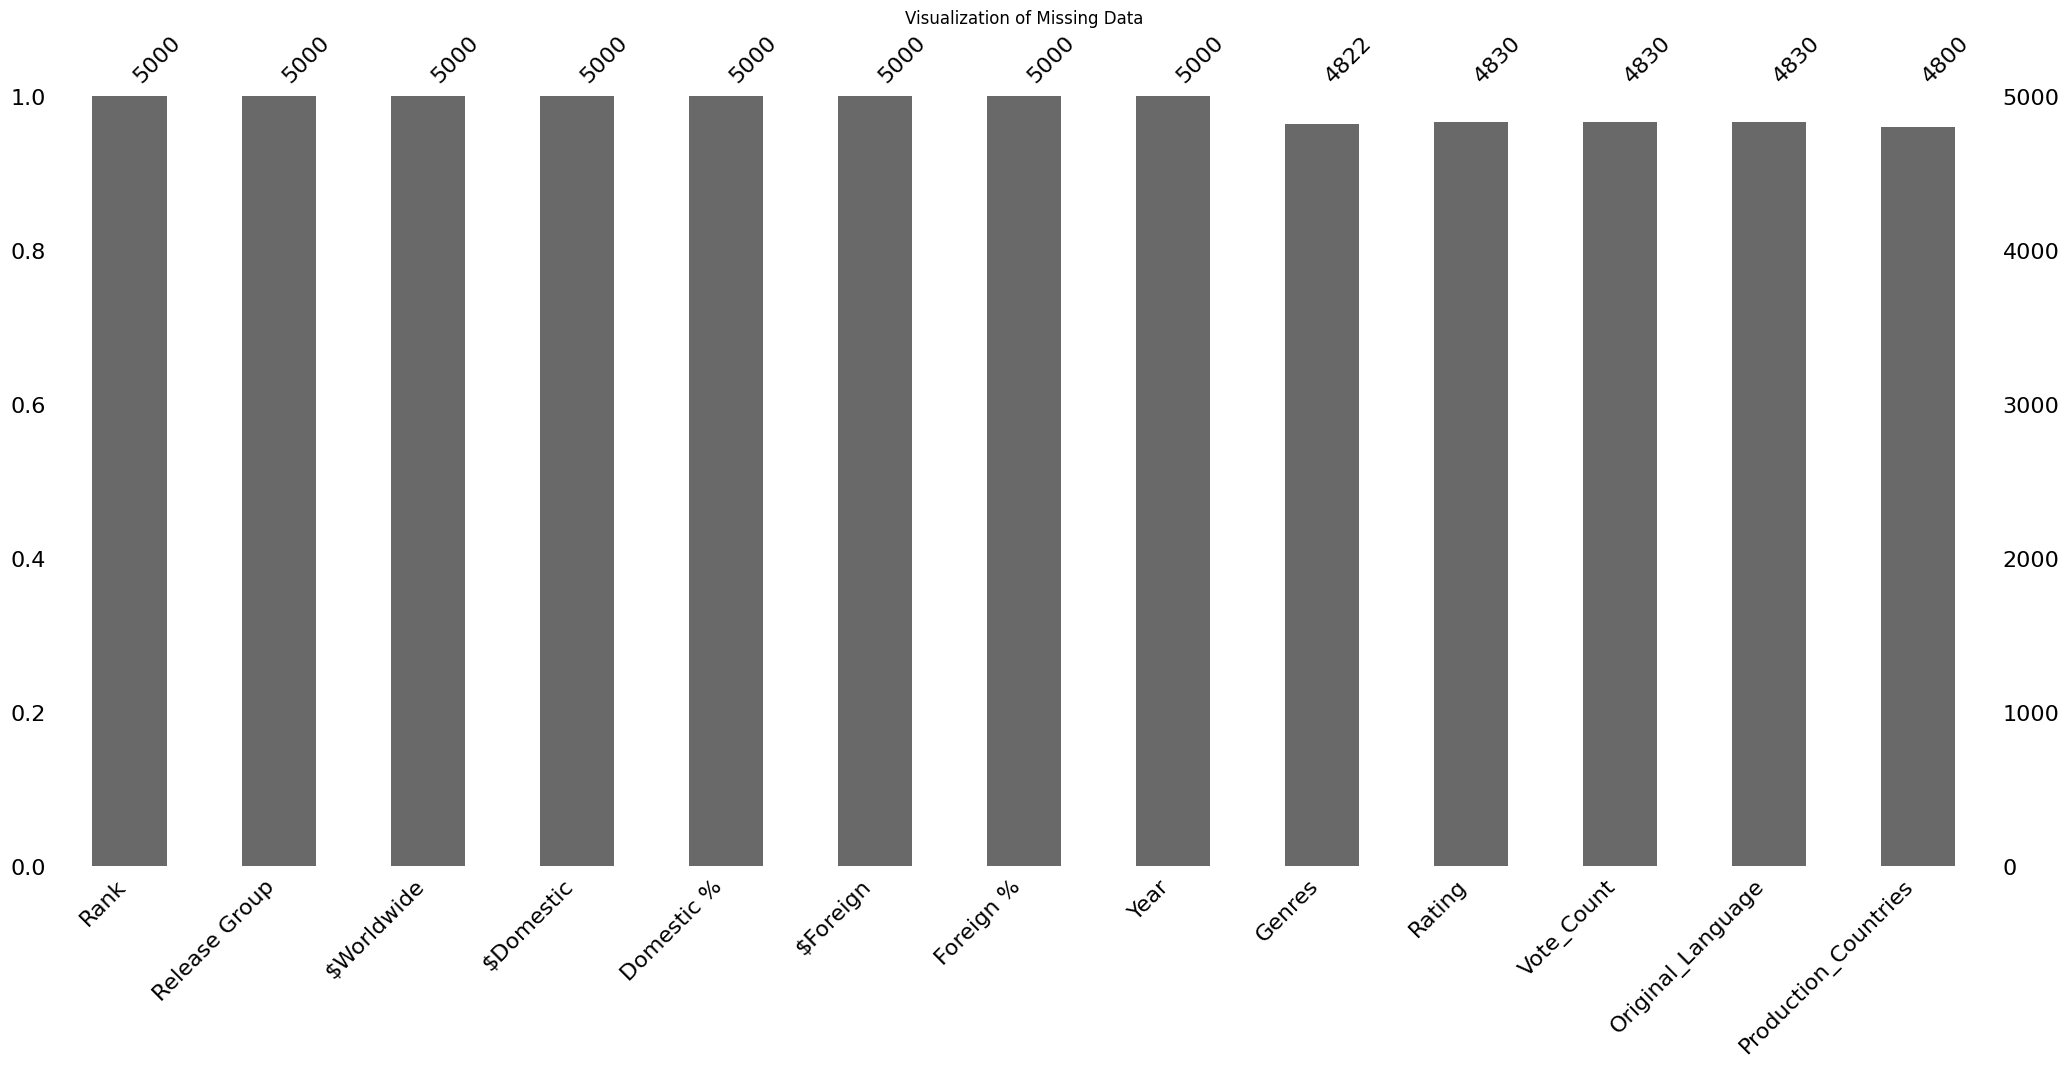

In [11]:
plt.ion()  
plt.figure(figsize = (2,7))
msno.bar(df)
plt.title("Visualization of Missing Data")
plt.show()


* It is a graph used to show missing data. Missing data is observed in the columns "Genres," "Rating," "Vote_Count," "Original_Language," and "Production_Countries."

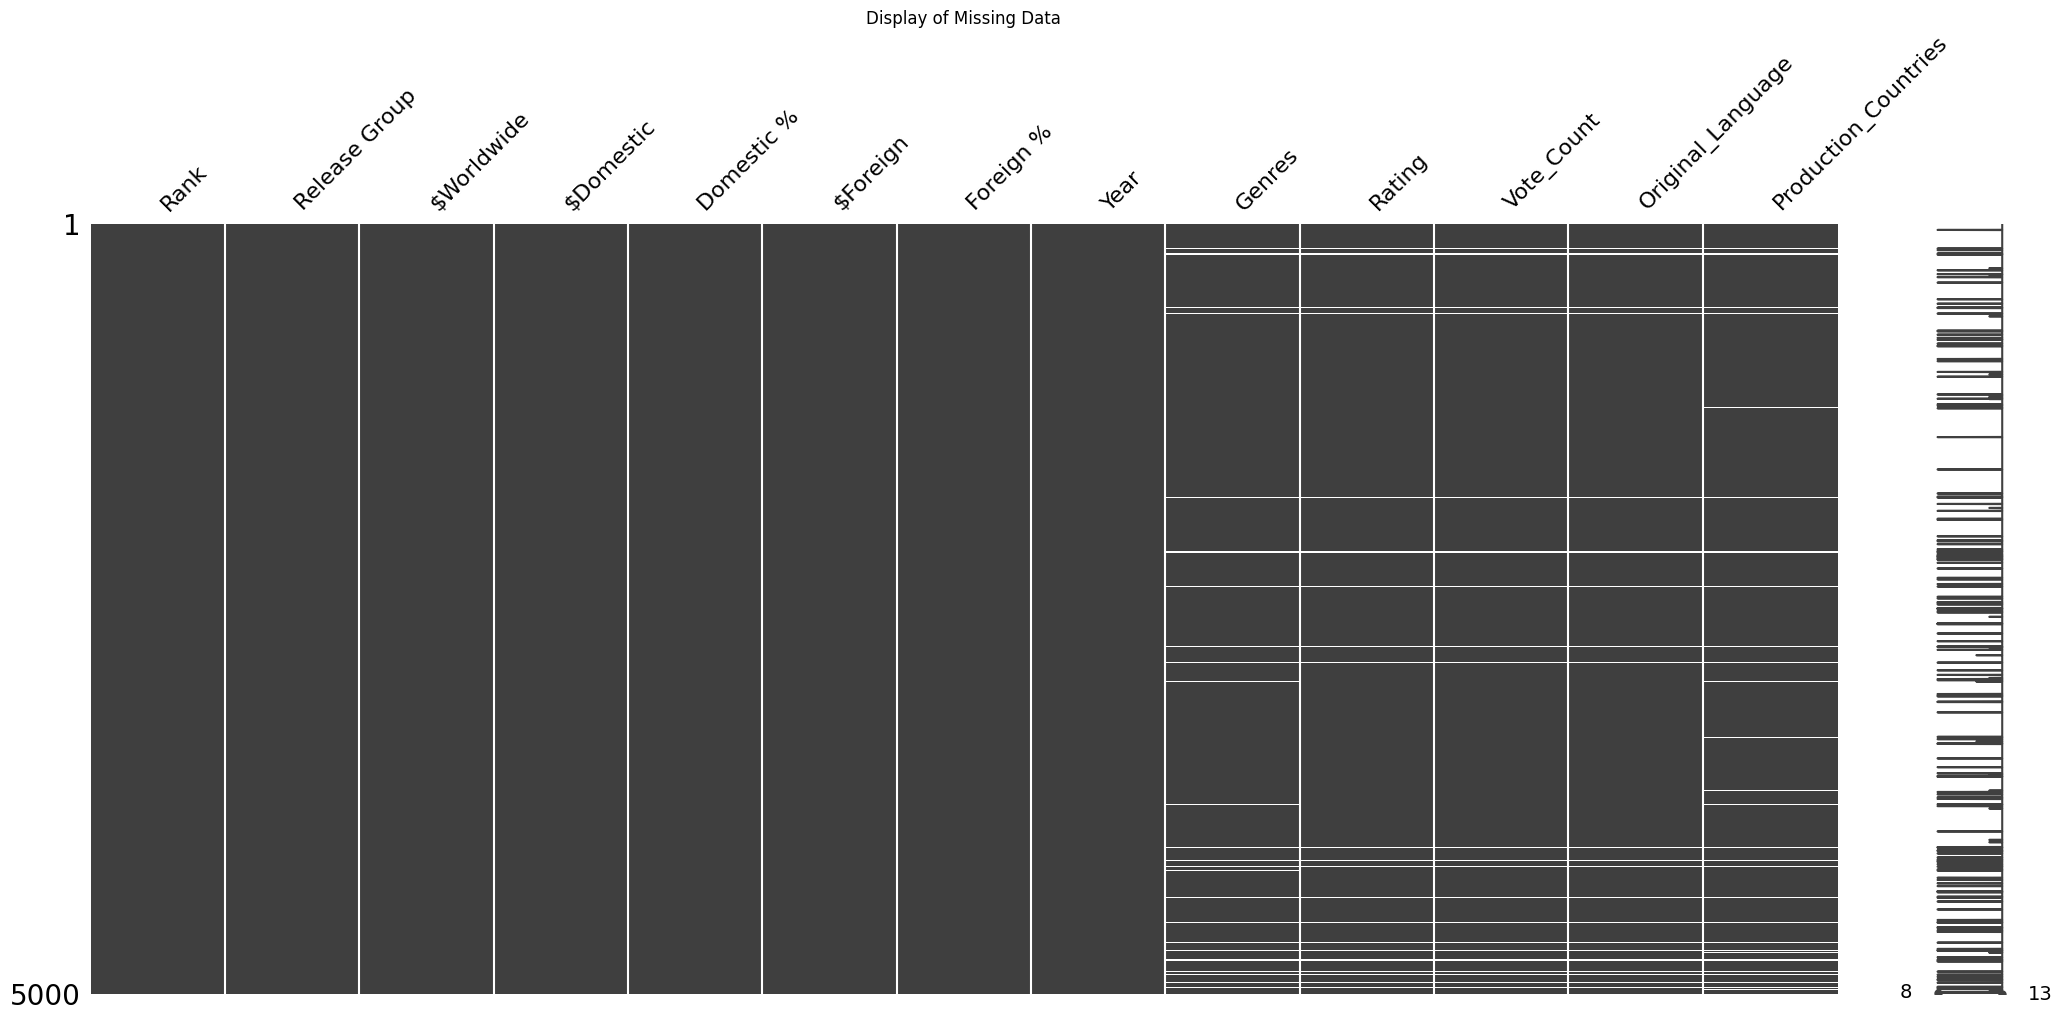

In [12]:
## A visual representation showing the structural distortion of missing data.
msno.matrix(df)
plt.title("Display of Missing Data")
plt.show()

* The parts without observed values are the white sections.
* We can interpret that these missing observation values are related to each other because all the missing data are observed in the same rows in our graph.

<Figure size 600x400 with 0 Axes>

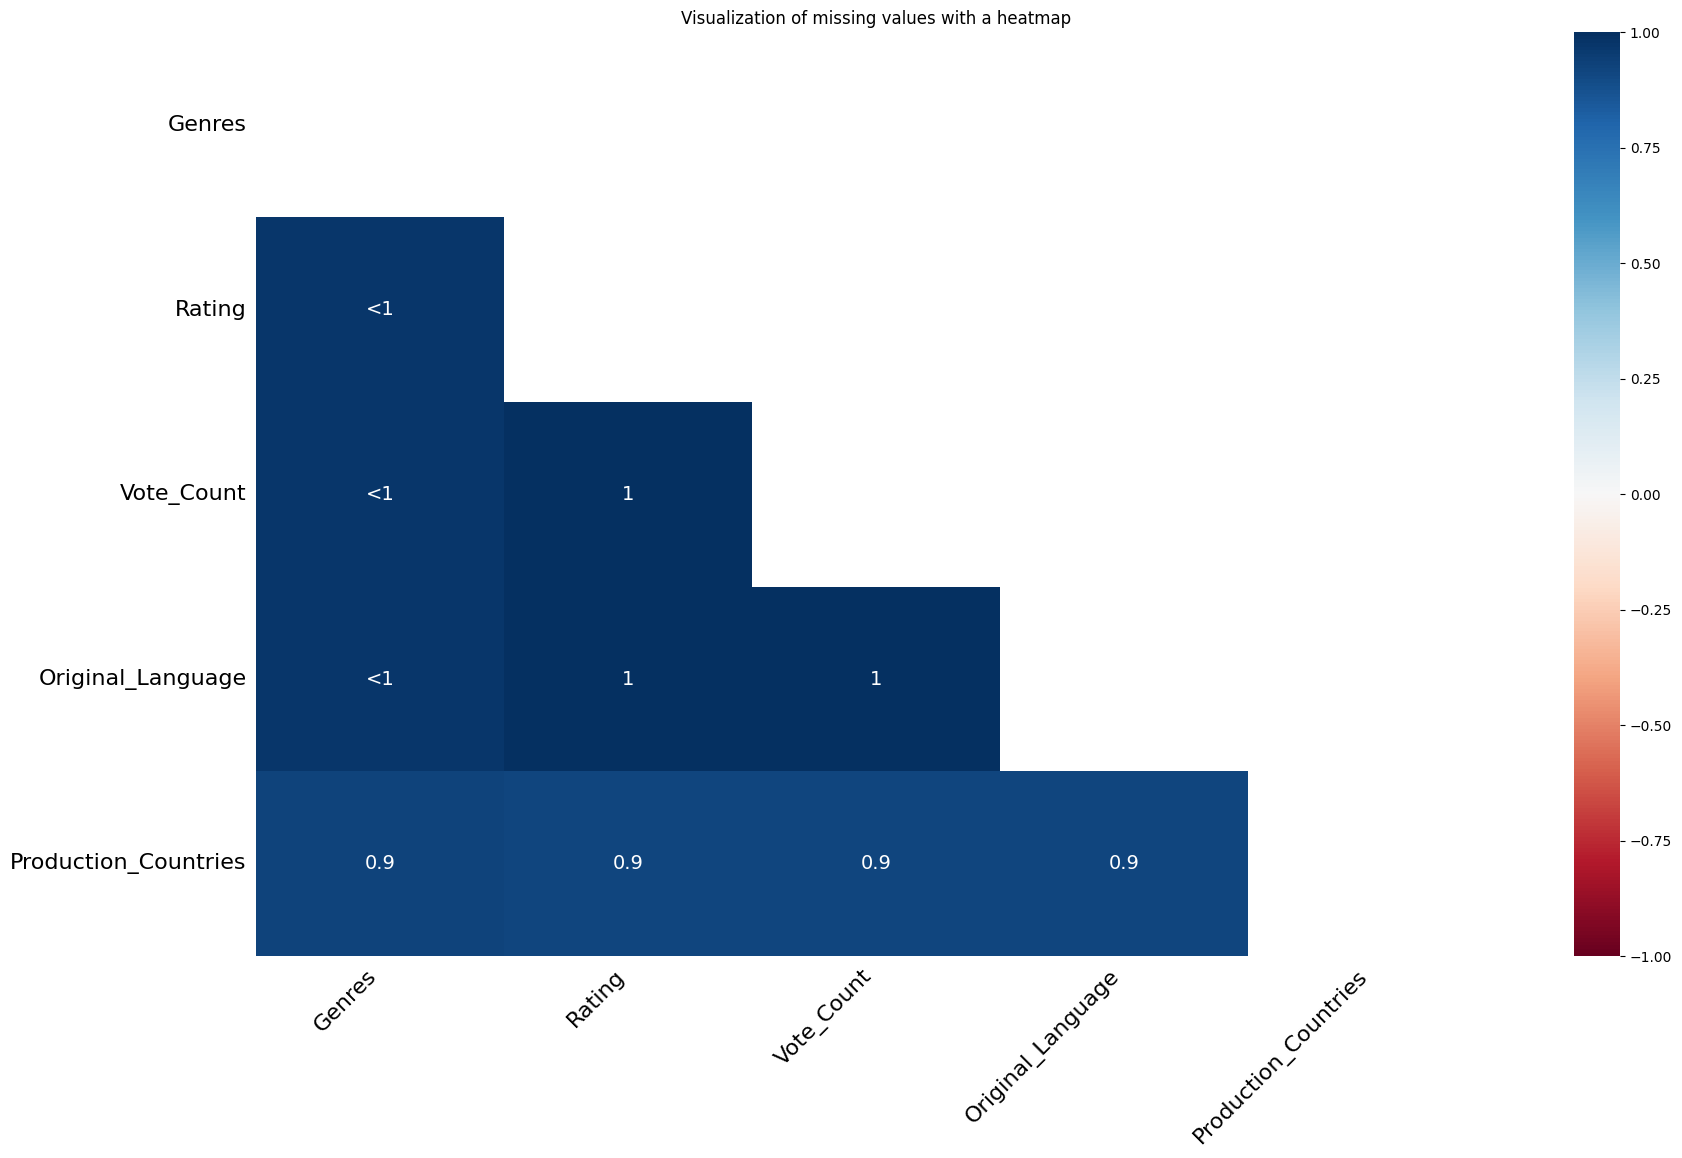

In [13]:
## Visualization of missing values with a heatmap.
plt.figure(figsize=(6, 4))
msno.heatmap(df)
plt.title("Visualization of missing values with a heatmap")
plt.show()

* The correlation data shows that there is a high degree of missing data, and we can interpret that these missing values are related to each other.

<a id = "7"></a>
## Deletion of Missing Data

* Since the majority of the missing data is empty and the important columns are missing, we are deleting these missing rows.

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Rank                    0
Release Group           0
$Worldwide              0
$Domestic               0
Domestic %              0
$Foreign                0
Foreign %               0
Year                    0
Genres                  0
Rating                  0
Vote_Count              0
Original_Language       0
Production_Countries    0
dtype: int64

In [16]:
df.head()

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
0,1,Mission: Impossible II,546388108.0,215409889.0,39.4,330978219.0,60.6,2000,"Adventure, Action, Thriller",6.126/10,6741.0,en,United States of America
1,2,Gladiator,460583960.0,187705427.0,40.8,272878533.0,59.2,2000,"Action, Drama, Adventure",8.217/10,19032.0,en,"United Kingdom, United States of America"
2,3,Cast Away,429632142.0,233632142.0,54.4,196000000.0,45.6,2000,"Adventure, Drama",7.663/10,11403.0,en,United States of America
3,4,What Women Want,374111707.0,182811707.0,48.9,191300000.0,51.1,2000,"Comedy, Romance",6.45/10,3944.0,en,"United Kingdom, United States of America"
4,5,Dinosaur,349822765.0,137748063.0,39.4,212074702.0,60.6,2000,"Animation, Family, Adventure",6.544/10,2530.0,en,United States of America


In [17]:
df.shape

(4797, 13)

<a id = "8"></a>
## Data Analysis

<a id = "9"></a>
## Total Box Office Revenue Over Years

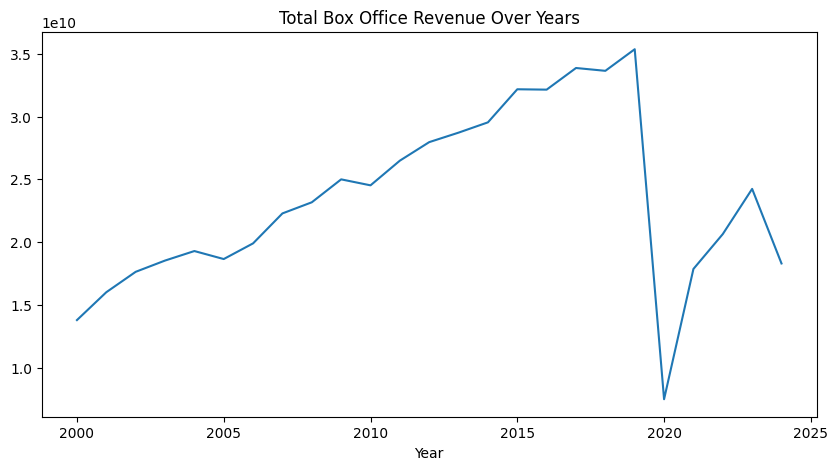

In [18]:
df.groupby("Year")["$Worldwide"].sum().plot(kind="line", figsize=(10, 5), title="Total Box Office Revenue Over Years")  
plt.show()  

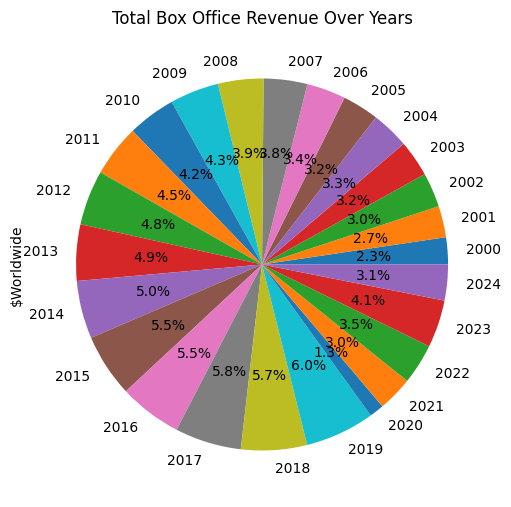

In [19]:
df.groupby("Year")["$Worldwide"].sum().plot(kind="pie", figsize=(6,10), title="Total Box Office Revenue Over Years", autopct='%1.1f%%')  
plt.show()


<a id = "10"></a>
## Distribution of Domestic and Foreign Revenue Percentages

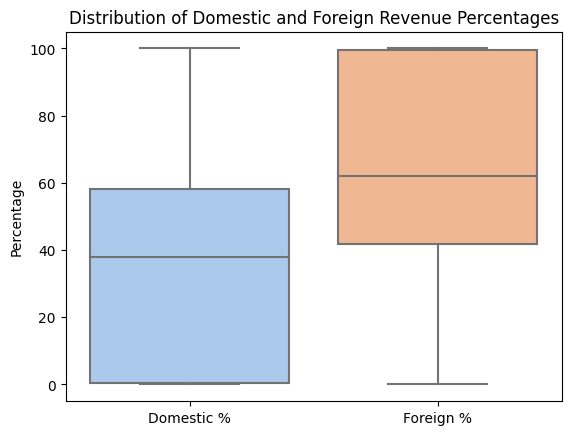

In [20]:
sns.boxplot(data = df[["Domestic %", "Foreign %"]], palette = "pastel")
plt.title("Distribution of Domestic and Foreign Revenue Percentages")
plt.ylabel("Percentage")
plt.show()

<a id = "11"></a>
## Highest Grossing Films

In [21]:
df_wide = df[df.loc[:, "$Worldwide"] > 1.510983e+09]
df_wide = df_wide.sort_values(by="$Worldwide", ascending=False)
df_wide

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
3800,1,Avengers: Endgame,2.799439e+09,858373000.0,30.7,1.941066e+09,69.3,2019,"Adventure, Science Fiction, Action",8.246/10,25780.0,en,United States of America
1800,1,Avatar,2.743578e+09,749766139.0,27.3,1.993811e+09,72.7,2009,"Action, Adventure, Fantasy, Science Fiction",7.583/10,31654.0,en,"United States of America, United Kingdom"
4400,1,Avatar: The Way of Water,2.320250e+09,684075767.0,29.5,1.636175e+09,70.5,2022,"Science Fiction, Adventure, Action",7.616/10,12052.0,en,United States of America
3000,1,Star Wars: Episode VII - The Force Awakens,2.068224e+09,936662225.0,45.3,1.131561e+09,54.7,2015,"Adventure, Action, Science Fiction",7.271/10,19411.0,en,United States of America
3600,1,Avengers: Infinity War,2.048360e+09,678815482.0,33.1,1.369544e+09,66.9,2018,"Adventure, Action, Science Fiction",8.242/10,29914.0,en,United States of America
4200,1,Spider-Man: No Way Home,1.910983e+09,804793477.0,42.1,1.106189e+09,57.9,2021,"Action, Adventure, Science Fiction",8.0/10,20275.0,en,United States of America
4800,1,Inside Out 2,1.698773e+09,652980194.0,38.4,1.045793e+09,61.6,2024,"Animation, Adventure, Comedy, Family",7.566/10,5141.0,en,United States of America
3001,2,Jurassic World,1.670401e+09,652270625.0,39.0,1.018130e+09,61.0,2015,"Action, Adventure, Science Fiction, Thriller",6.7/10,20370.0,en,United States of America
3801,2,The Lion King,1.656943e+09,543638043.0,32.8,1.113305e+09,67.2,2019,"Adventure, Drama, Family, Animation",7.116/10,10058.0,en,United States of America
2400,1,The Avengers,1.518813e+09,623357910.0,41.0,8.954551e+08,59.0,2012,"Science Fiction, Action, Adventure",7.724/10,30942.0,en,United States of America


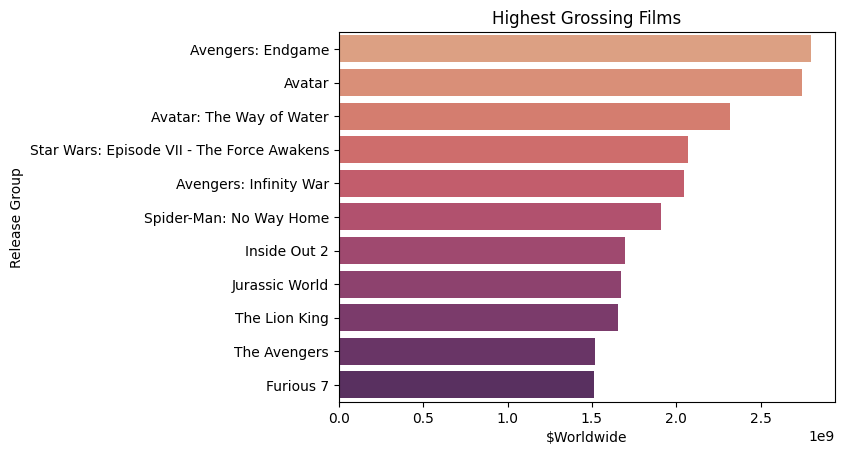

In [22]:
sns.barplot(x = "$Worldwide", y = "Release Group" , data = df_wide, palette = "flare")
plt.title("Highest Grossing Films")
plt.show()

The movie with the highest box office revenue is Avengers: Endgame. 

<a id = "12"></a>
## Movies with the highest box office revenue domestically.

In [23]:
df_domestic = df[df.loc[:, "$Domestic"] > 623357910.0]
df_domestic = df_domestic.sort_values(by="$Domestic", ascending=False)
df_domestic

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
3000,1,Star Wars: Episode VII - The Force Awakens,2.068224e+09,936662225.0,45.3,1.131561e+09,54.7,2015,"Adventure, Action, Science Fiction",7.271/10,19411.0,en,United States of America
3800,1,Avengers: Endgame,2.799439e+09,858373000.0,30.7,1.941066e+09,69.3,2019,"Adventure, Science Fiction, Action",8.246/10,25780.0,en,United States of America
4200,1,Spider-Man: No Way Home,1.910983e+09,804793477.0,42.1,1.106189e+09,57.9,2021,"Action, Adventure, Science Fiction",8.0/10,20275.0,en,United States of America
1800,1,Avatar,2.743578e+09,749766139.0,27.3,1.993811e+09,72.7,2009,"Action, Adventure, Fantasy, Science Fiction",7.583/10,31654.0,en,"United States of America, United Kingdom"
4401,2,Top Gun: Maverick,1.495696e+09,718732821.0,48.1,7.769635e+08,51.9,2022,"Action, Drama",8.194/10,9343.0,en,United States of America
3601,2,Black Panther,1.346913e+09,700059566.0,52.0,6.468536e+08,48.0,2018,"Action, Adventure, Science Fiction",7.38/10,22231.0,en,United States of America
4400,1,Avatar: The Way of Water,2.320250e+09,684075767.0,29.5,1.636175e+09,70.5,2022,"Science Fiction, Adventure, Action",7.616/10,12052.0,en,United States of America
3600,1,Avengers: Infinity War,2.048360e+09,678815482.0,33.1,1.369544e+09,66.9,2018,"Adventure, Action, Science Fiction",8.242/10,29914.0,en,United States of America
4800,1,Inside Out 2,1.698773e+09,652980194.0,38.4,1.045793e+09,61.6,2024,"Animation, Adventure, Comedy, Family",7.566/10,5141.0,en,United States of America
3001,2,Jurassic World,1.670401e+09,652270625.0,39.0,1.018130e+09,61.0,2015,"Action, Adventure, Science Fiction, Thriller",6.7/10,20370.0,en,United States of America


<a id = "13"></a>
## "Movies with the Highest Votes"

In [24]:
df_Vote = df[df.loc[:, "Vote_Count"] > 25799.0 ]
df_Vote = df_Vote.sort_values(by="Vote_Count", ascending=False)

In [25]:
df_Vote

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
2003,4,Inception,8.282587e+08,292576195.0,35.3,5.356825e+08,64.7,2010,"Action, Science Fiction, Adventure",8.37/10,36753.0,en,"United Kingdom, United States of America"
2809,10,Interstellar,6.810704e+08,188020017.0,27.6,4.930504e+08,72.4,2014,"Adventure, Drama, Science Fiction",8.4/10,35934.0,en,"United Kingdom, United States of America"
1600,1,The Dark Knight,1.003845e+09,533345358.0,53.1,4.705000e+08,46.9,2008,"Drama, Action, Crime, Thriller",8.5/10,33108.0,en,"United Kingdom, United States of America"
1800,1,Avatar,2.743578e+09,749766139.0,27.3,1.993811e+09,72.7,2009,"Action, Adventure, Fantasy, Science Fiction",7.583/10,31654.0,en,"United States of America, United Kingdom"
3208,9,Deadpool,7.826122e+08,363070709.0,46.4,4.195414e+08,53.6,2016,"Action, Adventure, Comedy",7.624/10,31141.0,en,United States of America
2400,1,The Avengers,1.518813e+09,623357910.0,41.0,8.954551e+08,59.0,2012,"Science Fiction, Action, Adventure",7.724/10,30942.0,en,United States of America
3600,1,Avengers: Infinity War,2.048360e+09,678815482.0,33.1,1.369544e+09,66.9,2018,"Adventure, Action, Science Fiction",8.242/10,29914.0,en,United States of America
2802,3,Guardians of the Galaxy,7.727766e+08,333176600.0,43.1,4.396000e+08,56.9,2014,"Action, Science Fiction, Adventure",7.906/10,28085.0,en,United States of America
200,1,Harry Potter and the Sorcerer's Stone,9.747554e+08,317575550.0,32.6,6.571798e+08,67.4,2001,"Adventure, Fantasy",7.907/10,27607.0,en,"United Kingdom, United States of America"
1607,8,Iron Man,5.853662e+08,318604126.0,54.4,2.667621e+08,45.6,2008,"Action, Science Fiction, Adventure",7.647/10,26470.0,en,United States of America


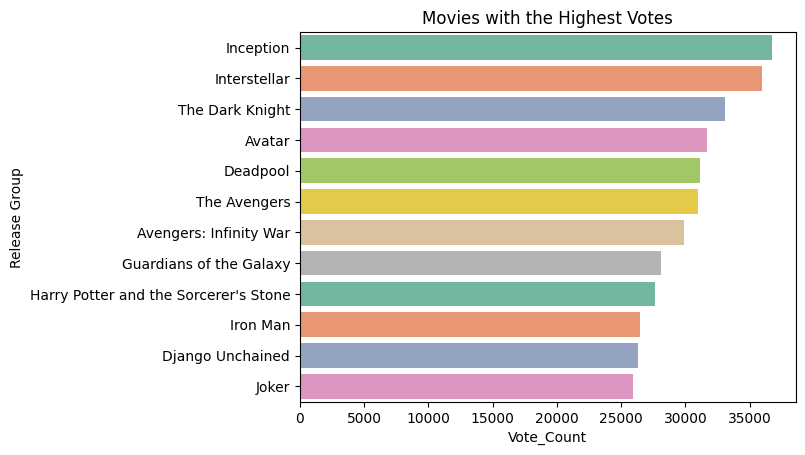

In [26]:
sns.barplot(x = "Vote_Count", y = "Release Group" , data = df_Vote, palette = "Set2")
plt.title("Movies with the Highest Votes")
plt.show()

The movie with the highest votes is Inception.

<a id = "14"></a>
## "Movies with the Highest Ratings"

In [27]:
df["Rating"] = df["Rating"].str.replace("/10", "").astype(float)

In [28]:
df_rating = df[df.loc[:, "Rating"] > 8.5]
df_rating = df_rating.sort_values(by="Rating", ascending=False)

In [29]:
df_rating

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
4988,189,Attack on Titan the Movie: The Last Attack,7796800.0,0.0,0.0,7796800.0,100.0,2024,"Animation, Action, Drama",9.700,3.0,ja,Japan
4120,121,Break the Silence: The Movie,8954345.0,0.0,0.0,8954345.0,100.0,2020,"Music, Documentary",9.000,182.0,ko,South Korea
4945,146,The Enchanted Tinderbox,11676459.0,0.0,0.0,11676459.0,100.0,2024,"Drama, Fantasy, Adventure, Family",9.000,2.0,ru,Russia
4950,151,I'm Still Here,11100000.0,0.0,0.0,11100000.0,100.0,2024,"Drama, History",8.917,103.0,pt,"Brazil, France"
4477,78,BTS Permission to Dance on Stage - Seoul: Live...,32600000.0,6840000.0,21.0,25760000.0,79.0,2022,"Music, Documentary",8.900,118.0,ko,South Korea
4978,179,Uma Musume: Pretty Derby - Beginning of a New Era,8551637.0,0.0,0.0,8551637.0,100.0,2024,"Animation, Drama, Comedy, Fantasy",8.700,3.0,ja,Japan
4513,114,Godfather,18737287.0,0.0,0.0,18737287.0,100.0,2022,"Drama, Crime",8.690,20799.0,en,United States of America
4688,89,Renaissance: A Film by Beyoncé,43989684.0,33889684.0,77.0,10100000.0,23.0,2023,"Music, Documentary",8.600,27.0,en,United States of America
4795,196,Pretty Cure All Stars F,8557763.0,0.0,0.0,8557763.0,100.0,2023,"Animation, Action, Adventure, Comedy, Family, ...",8.600,5.0,ja,Japan
214,15,Spirited Away,274925095.0,10055859.0,3.7,264869236.0,96.3,2001,"Animation, Family, Fantasy",8.538,16628.0,ja,Japan


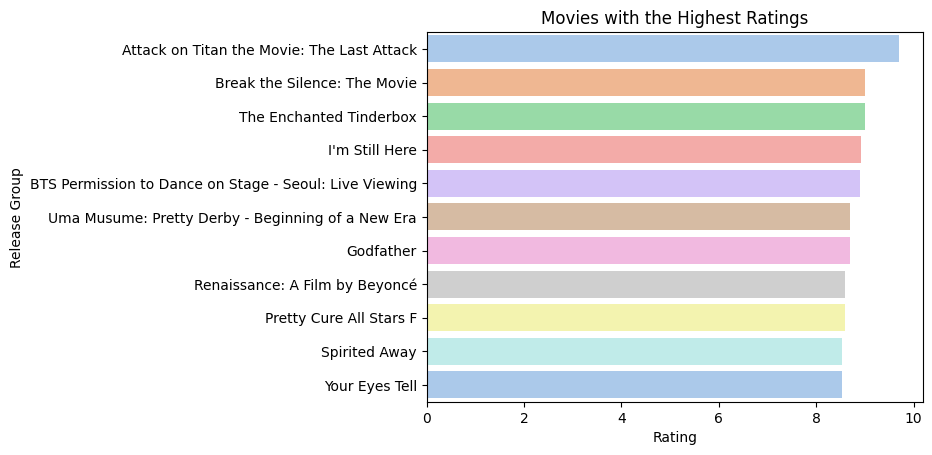

In [30]:
sns.barplot(x = "Rating", y = "Release Group" , data = df_rating, palette = "pastel")
plt.title("Movies with the Highest Ratings")
plt.show()

The movie with the highest rating is Attack on Titan the Movie: The Last Attack, but for me, the highest movie is The Godfather.

<a id = "15"></a>
## Heat Map

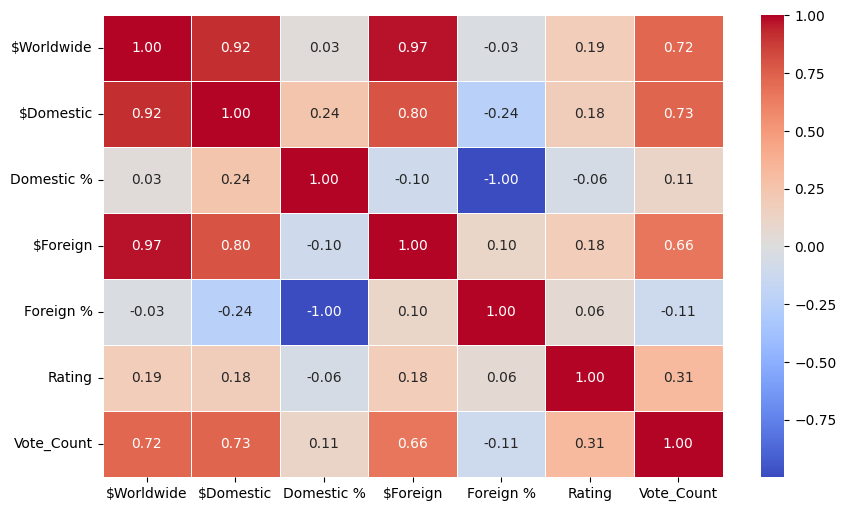

In [31]:
numeric_columns = ["$Worldwide", "$Domestic", "Domestic %", "$Foreign", "Foreign %", "Rating", "Vote_Count"]
df_numeric = df[numeric_columns]

f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, ax=ax)
plt.show()

In [32]:
df_numeric.corr().T

,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Rating,Vote_Count
$Worldwide,1.000000,0.915176,0.025916,0.972518,-0.025909,0.187265,0.723031
$Domestic,0.915176,1.000000,0.243279,0.796184,-0.243268,0.175557,0.730473
Domestic %,0.025916,0.243279,1.000000,-0.101627,-1.000000,-0.059718,0.111694
$Foreign,0.972518,0.796184,-0.101627,1.000000,0.101631,0.179704,0.663434
Foreign %,-0.025909,-0.243268,-1.000000,0.101631,1.000000,0.059705,-0.111687
Rating,0.187265,0.175557,-0.059718,0.179704,0.059705,1.000000,0.314497
Vote_Count,0.723031,0.730473,0.111694,0.663434,-0.111687,0.314497,1.000000


<a id = "16"></a>
## Türkiye and World Total movies

In [33]:
df_turk = df[df['Production_Countries'] == 'Turkey'].value_counts().sum()
df_turk

19

In [34]:
df_w = df['Production_Countries'].value_counts().sum() 

In [35]:
df_world = df_w - df_turk
df_world

4778

In [36]:
df_turkey = df[df['Production_Countries'] == 'Turkey'].value_counts().sum()
df_d = pd.DataFrame({'Country': ['Turkey', 'World'],
    'Movie_Counts': [df_turkey,df_world ]})
df_d

,Country,Movie_Counts
0,Turkey,19
1,World,4778


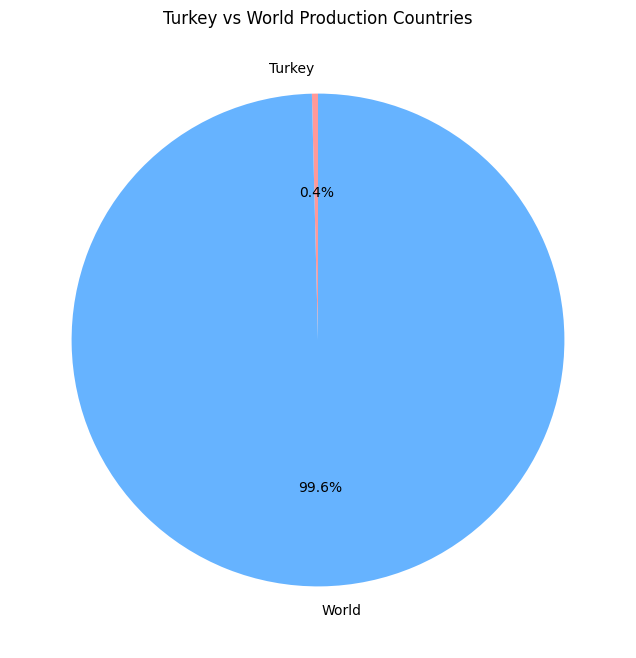

In [37]:

df_world = df_w - df_turk

data = {'Turkey': df_turk, 'World': df_world}
labels = list(data.keys())
sizes = list(data.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Turkey vs World Production Countries")
plt.show()

<a id = "17"></a>
## Comparison of total box office revenues in Turkey and the World

In [38]:
df_t = df[df['Production_Countries'] == 'Turkey']['$Worldwide'].sum()
df_t

429188717.0

In [39]:
df_ww = df['$Worldwide'].sum()
df_ww

587269885311.0

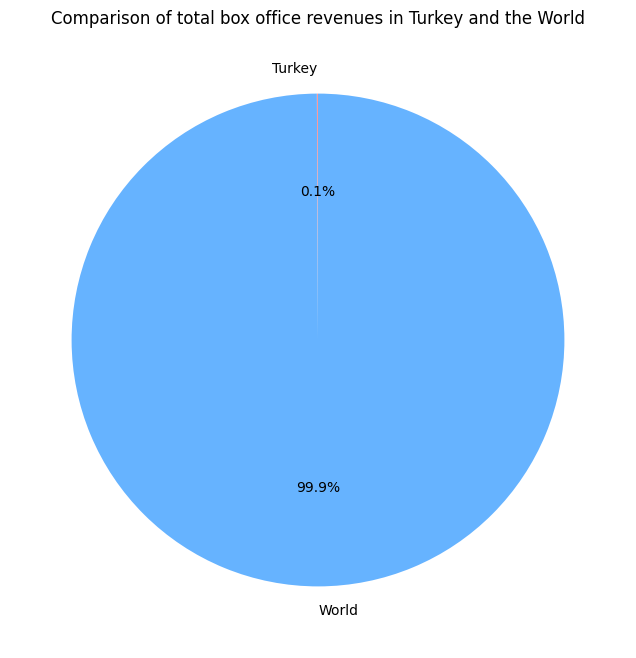

In [40]:
data = {'Turkey': df_t, 'World': df_ww}
labels = list(data.keys())
sizes = list(data.values())

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=["#ff9999", "#66b3ff"])
plt.title("Comparison of total box office revenues in Turkey and the World")
plt.show()

<a id = "18"></a>
## Türkiye Data Analysis

In [41]:
df_turkiye = df[df['Production_Countries'] == 'Turkey']
df_turkiye

,Rank,Release Group,$Worldwide,$Domestic,Domestic %,$Foreign,Foreign %,Year,Genres,Rating,Vote_Count,Original_Language,Production_Countries
946,147,G.O.R.A.,20839049.0,0.0,0.0,20839049.0,100.0,2004,"Comedy, Adventure, Science Fiction",7.340,322.0,tr,Turkey
977,178,Vizontele Tuuba,13954476.0,0.0,0.0,13954476.0,100.0,2004,"Comedy, Drama",6.200,92.0,tr,Turkey
1174,175,My Father and My Son,18612999.0,0.0,0.0,18612999.0,100.0,2005,Drama,7.502,326.0,tr,Turkey
1363,164,Valley of the Wolves: Iraq,23465471.0,0.0,0.0,23465471.0,100.0,2006,"Action, War, Drama",5.200,76.0,tr,Turkey
1759,160,Recep Ivedik,28548025.0,0.0,0.0,28548025.0,100.0,2008,Comedy,4.857,147.0,tr,Turkey
1786,187,A.R.O.G,22212369.0,0.0,0.0,22212369.0,100.0,2008,"Science Fiction, Fantasy, Comedy",6.971,242.0,tr,Turkey
1960,161,Recep Ivedik 2,27699692.0,0.0,0.0,27699692.0,100.0,2009,Comedy,4.539,129.0,tr,Turkey
2106,107,Veda - Atatürk,55024621.0,0.0,0.0,55024621.0,100.0,2010,"History, Drama",5.900,33.0,tr,Turkey
2173,174,Recep Ivedik 3,22588876.0,0.0,0.0,22588876.0,100.0,2010,Comedy,4.604,120.0,tr,Turkey
2377,178,Eyyvah Eyvah 2,24792348.0,0.0,0.0,24792348.0,100.0,2011,Comedy,5.800,80.0,tr,Turkey


<a id = "19"></a>
## Vote Counts of Movies in Turkey

In [42]:
df_v = df_turkiye.sort_values(by="Vote_Count", ascending=False)

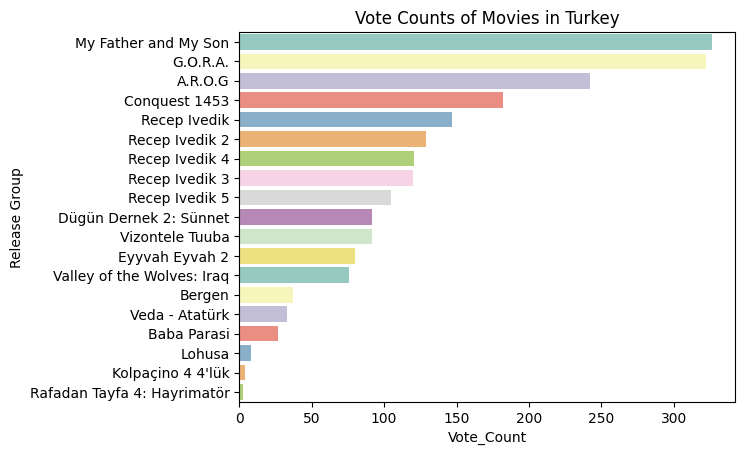

In [43]:
sns.barplot(x = "Vote_Count", y = "Release Group" , data = df_v, palette = "Set3")
plt.title("Vote Counts of Movies in Turkey")
plt.show()

<a id = "19"></a>
## Ratings of Films in Turkey

In [44]:
df_r = df_turkiye.sort_values(by="Rating", ascending=False)

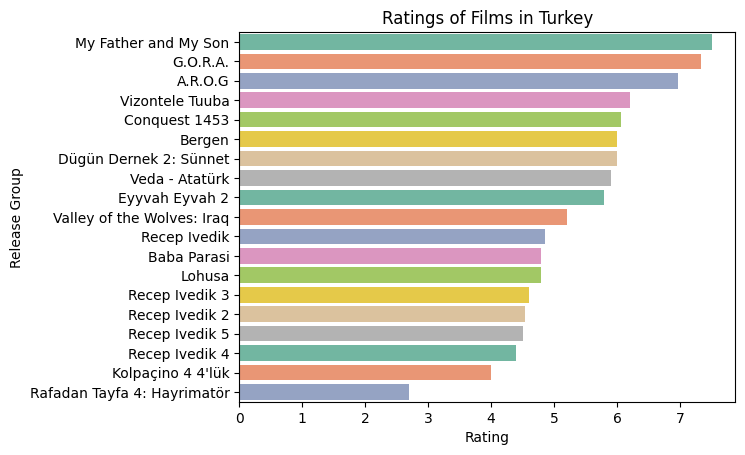

In [45]:
sns.barplot(x = "Rating", y = "Release Group" , data = df_r, palette = "Set2")
plt.title("Ratings of Films in Turkey")
plt.show()

<a id = "20"></a>
## Box Office Revenues of Films in Turkey

In [46]:
df_c = df_turkiye.sort_values(by="$Worldwide", ascending=False)

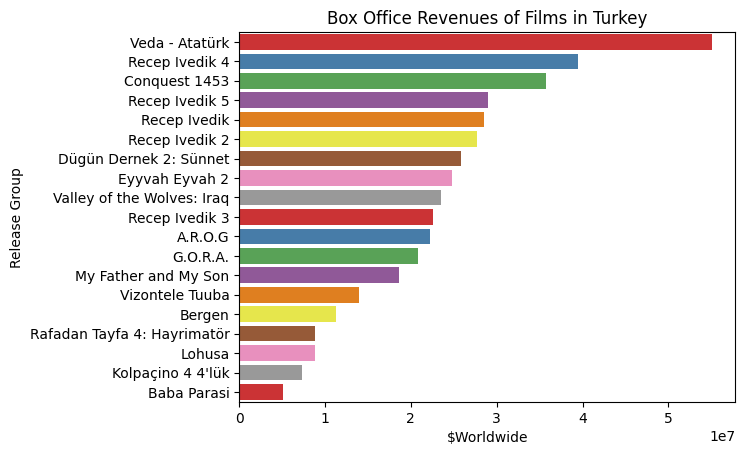

In [47]:
sns.barplot(x = "$Worldwide", y = "Release Group" , data = df_c, palette = "Set1")
plt.title("Box Office Revenues of Films in Turkey")
plt.show()